6252320 Leon Debnath

# Lab 1 - Decision Trees

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Initially we define a function that will allow us to easily create a decision tree and modify the variables that we want to experiment with.  Our output value is the accuracy of the model against a test/train split that we will maintain using the random seed to allow for reproduceability.

In [2]:
def ave_decision_tree(X, Y, levels, min_samples_leaf):
        
    count = 100
    total_acc_test = 0
    total_acc_train = 0
    best_accuracy = 0
        
    for i in range(1, count):
        result = single_decision_tree(X, Y, levels, min_samples_leaf, i)
        total_acc_test = total_acc_test + result['acc_test']
        total_acc_train = total_acc_train + result['acc_train']
        
        if(result['acc_test'] > best_accuracy):
            best_clf = result['clf']
    
    data = {'acc_test': total_acc_test / count,
            'acc_train': total_acc_train / count,
            'clf' : best_clf}
    
    return data
    

def single_decision_tree(X, Y, levels, min_samples_leaf, rand_seed):
    # Split X and Y into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                        test_size=0.33, 
                                                        random_state=rand_seed)
    
    # Set the max depth automatically to `None` if 0
    if levels == 0:
        max_depth = None
    else:
        max_depth = levels
        
    # Create a decision tree and train it
    clf = tree.DecisionTreeClassifier(criterion = 'entropy',
                                      min_samples_leaf=min_samples_leaf, 
                                      max_depth=max_depth)
    clf.fit(X_train, Y_train)
    
    # Predict the values for the test set and return the accuracy and tree
    Y_train_hat = clf.predict(X_train)
    Y_test_hat = clf.predict(X_test)
    
       
    data = {'acc_test': accuracy_score(Y_test, Y_test_hat),
            'acc_train': accuracy_score(Y_train, Y_train_hat),
           'clf' : clf}
    
    return data

## Diabetes Data Set
Next we read in the Diabetes data example and split the data into X and Y values.

In [3]:
data = pd.read_csv('diabetes.csv')
X = data.drop('class', axis=1)
Y = data['class']

Training the tree with a single level and a minimum of 1 sample per leaf gives us an accuracy of around 70%.

Training accuracy at 1 level is: 0.7302334630350196
Test accuracy at 1 level is: 0.7074803149606298


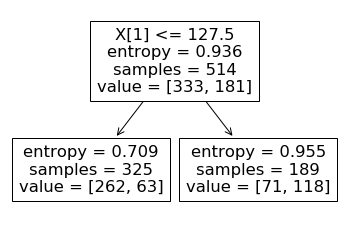

In [4]:
data = ave_decision_tree(X, Y, levels=1, min_samples_leaf=1)
print('Training accuracy at 1 level is: ' + str(data['acc_train']))
print('Test accuracy at 1 level is: ' + str(data['acc_test']))
tree.plot_tree(data['clf']);

Training accuracy at 2 levels is: 0.7530155642023346
Test accuracy at 2 levels is: 0.726732283464567


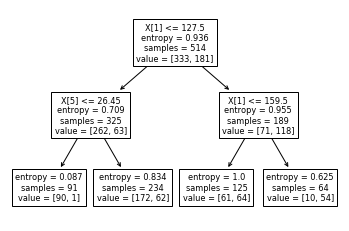

In [5]:
data = ave_decision_tree(X, Y, levels=2, min_samples_leaf=1)
print('Training accuracy at 2 levels is: ' + str(data['acc_train']))
print('Test accuracy at 2 levels is: ' + str(data['acc_test']))
tree.plot_tree(data['clf']);

Training accuracy at 3 level is: 0.7650778210116733
Test accuracy at 3 level is: 0.7273622047244094


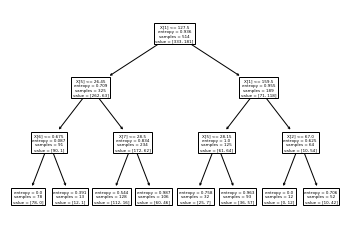

In [6]:
data = ave_decision_tree(X, Y, levels=3, min_samples_leaf=1)
print('Training accuracy at 3 level is: ' + str(data['acc_train']))
print('Test accuracy at 3 level is: ' + str(data['acc_test']))
tree.plot_tree(data['clf']);

As we increase the number of levels, the accuracy seems to trend upwards, we can explore this by plotting the number of levels against the accuracy to see if we can find an optimum.


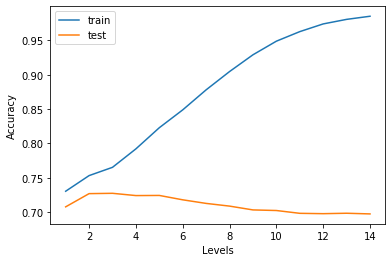

In [7]:
no_of_levels = range(1, 15)
acc_train = list()
acc_test = list()
for l in no_of_levels:
    data = ave_decision_tree(X, Y, levels=l, min_samples_leaf=1)
    acc_train.append(data['acc_train'])
    acc_test.append(data['acc_test'])

plt.plot(no_of_levels, acc_train, label='train')
plt.plot(no_of_levels, acc_test, label='test')
plt.legend()
plt.xlabel("Levels")
plt.ylabel("Accuracy")
plt.show();

It seems that 5 levels provide optimum accuracy on the test set, however with a minimum sample of 1 per leaf, the performance is still quite erratic. We can hope to tune the parameters further by testing between 1 and 10 levels at different minimum sample values.  There is a clear region of overfitting above 8 levels and upwards where the model predicts 100% accuracy on the training set with a decrease in the test set accuracy

In [8]:
def test_min_samples(levels, max_samples):
    x = list()
    y = list()
    for i in range(1,max_samples):
        data = ave_decision_tree(X, Y, levels=levels, min_samples_leaf=i)
        y.append(data['acc_test'])
        x.append(i)
    
    return [x, y]

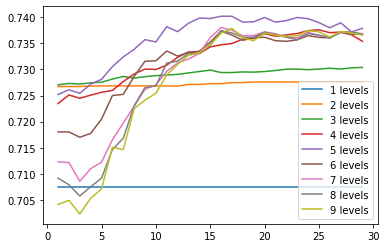

In [9]:
for i in range(1, 10):
    x, y = test_min_samples(i, 30);
    plt.plot(x, y, label=str(i)+ ' levels')

plt.legend()
plt.show()

We can see that 5 levels with a min sample of 15 gives us the optimal accuracy for the decision tree so we can set out parameters and run the test again to see the final tree. Above that, the data is clearly overfitted with all of the trees providing almost identical accuracy on the test set, below that the data is underfitted. 

Training accuracy at 5 levels is: 0.8160700389105053
Test accuracy at 5 levels is: 0.734763779527559


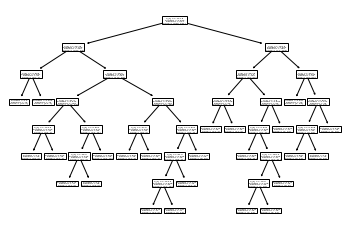

In [10]:
data = ave_decision_tree(X, Y, levels=8, min_samples_leaf=15)
print('Training accuracy at 5 levels is: ' + str(data['acc_train']))
print('Test accuracy at 5 levels is: ' + str(data['acc_test']))
tree.plot_tree(data['clf']);

## Glass Data Set

We can run the same experiment on the Glass data set:

In [11]:
data = pd.read_csv('glass.csv')
X = data.drop('class', axis=1)
Y = data['class']
accuracy = ave_decision_tree(X, Y, 10, 1)

A single decision tree:

Training accuracy at 1 level is: 0.4479720279720275
Test accuracy at 1 level is: 0.41000000000000014


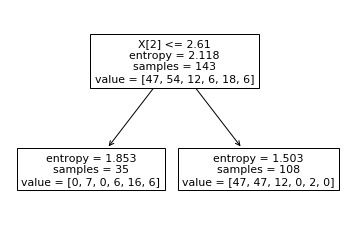

In [12]:
data = ave_decision_tree(X, Y, levels=1, min_samples_leaf=1)
print('Training accuracy at 1 level is: ' + str(data['acc_train']))
print('Test accuracy at 1 level is: ' + str(data['acc_test']))
tree.plot_tree(data['clf']);

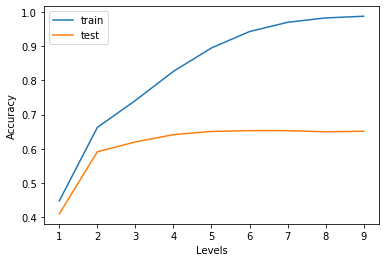

In [13]:
no_of_levels = range(1, 10)
acc_train = list()
acc_test = list()
for l in no_of_levels:
    data = ave_decision_tree(X, Y, levels=l, min_samples_leaf=1)
    acc_test.append(data['acc_test'])
    acc_train.append(data['acc_train'])

plt.plot(no_of_levels, acc_train, label='train')
plt.plot(no_of_levels, acc_test, label='test')
plt.legend()
plt.xlabel("Levels")
plt.ylabel("Accuracy")
plt.show();

Again we see overfitting around 5-8 levels upwards where the model is not improving in performance but the test set is gaining more and more accuracy.  We can select an optimum at the height of the plateu (4 levels) and proceed with finding the optimal value for minimum samples. 

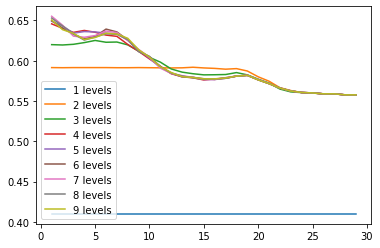

In [14]:
for i in range(1, 10):
    x, y = test_min_samples(i, 30);
    plt.plot(x, y, label=str(i)+ ' levels')

plt.legend()
plt.show()

We can see that the optimal parameters seem to be 4 layers with a minimum samples of 6 providing around 63% accuracy

Training accuracy at 4 levels is: 0.7725174825174822
Test accuracy at 4 levels is: 0.6309859154929576


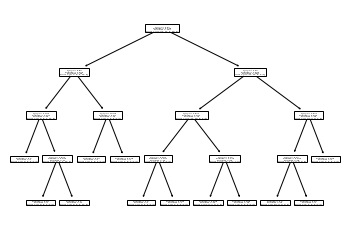

In [15]:
data = ave_decision_tree(X, Y, levels=4, min_samples_leaf=6)
print('Training accuracy at 4 levels is: ' + str(data['acc_train']))
print('Test accuracy at 4 levels is: ' + str(data['acc_test']))
tree.plot_tree(data['clf']);